In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from xgboost import XGBClassifier
# from sklearn.ensemble import GradientBoostingClassifier

c:\python\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:

def one_hot_encoding(df, feature):
    data = df.copy()
    onehot = OneHotEncoder()
    onehot.fit(data[[feature]])

    encoded = onehot.transform(data[[feature]])
    data[onehot.categories_[0]] = encoded.toarray()
    return data.drop(feature, axis=1)


df_train = pd.read_csv('Train_Dataset_190649F.csv')
df_test = pd.read_csv('Test_Dataset_190649F.csv')

df_train.intertiol_plan.replace('no', 0, inplace=True)
df_train.intertiol_plan.replace('yes', 1, inplace=True)

df_test.intertiol_plan.replace('no', 0, inplace=True)
df_test.intertiol_plan.replace('yes', 1, inplace=True)

df_train.voice_mail_plan.replace('no', 0, inplace=True)
df_train.voice_mail_plan.replace('yes', 1, inplace=True)

df_test.voice_mail_plan.replace('no', 0, inplace=True)
df_test.voice_mail_plan.replace('yes', 1, inplace=True)

df_train.Churn.replace('No', 0, inplace=True)
df_train.Churn.replace('Yes', 1, inplace=True)

df_train = one_hot_encoding(df_train, 'location_code')
df_test = one_hot_encoding(df_test, 'location_code')

# new features
df_train['total_charge'] = df_train['total_intl_charge'] + df_train['total_night_charge'] + df_train[
    'total_eve_charge'] + df_train['total_day_charge']
df_test['total_charge'] = df_test['total_intl_charge'] + df_test['total_night_charge'] + df_test['total_eve_charge'] + df_test['total_day_charge']

df_train['total_calls'] = df_train['total_intl_calls'] + df_train['total_night_calls'] + df_train['total_eve_calls'] +df_train['total_day_calls']
df_test['total_calls'] = df_test['total_intl_calls'] + df_test['total_night_calls'] + df_test['total_eve_calls'] + df_test['total_day_calls']

df_train['total_min'] = df_train['total_intl_minutes'] + df_train['total_night_minutes'] + df_train['total_eve_min'] +df_train['total_day_min']
df_test['total_min'] = df_test['total_intl_minutes'] + df_test['total_night_minutes'] + df_test['total_eve_min'] +df_test['total_day_min']

df_train["no_of_plans"] = df_train['intertiol_plan'] + df_train['voice_mail_plan']
df_test['no_of_plans'] = df_test['intertiol_plan'] + df_test['voice_mail_plan']

df_train['avg_call_mins'] = df_train['total_min'] / df_train['total_calls']
df_test['avg_call_mins'] = df_test['total_min'] / df_test['total_calls']

x_columns = ['account_length',
             'intertiol_plan',
             'voice_mail_plan',
             'number_vm_messages',
             'total_day_min',
             'total_day_calls',
             'total_day_charge',
             'total_eve_min',
             'total_eve_calls',
             'total_eve_charge',
             'total_night_minutes',
             'total_night_calls',
             'total_night_charge',
             'total_intl_minutes',
             'total_intl_calls',
             'total_intl_charge',
             'customer_service_calls',
             445.0,
             452.0,
             547.0,
             'total_charge',
             'total_calls',
             'total_min',
             'no_of_plans',
             'avg_call_mins']

x = df_train[x_columns]
y = df_train['Churn']




In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
rf = RandomForestClassifier(random_state=1, n_estimators=400)
rf.fit(x_train, y_train)

c:\python\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier(n_estimators=400, random_state=1)

In [5]:
predict = rf.predict(x_test)

c:\python\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [7]:
from sklearn.metrics import accuracy_score

In [8]:
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, predict)))

Accuracy: 
0.9698275862068966


In [9]:
df_train.head()

,customer_id,account_length,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,...,customer_service_calls,Churn,445.0,452.0,547.0,total_charge,total_calls,total_min,no_of_plans,avg_call_mins
0,1001,15.0,0,0,0.0,121.1,130.0,20.59,216.0,86.0,...,2.0,0,0.0,1.0,0.0,53.88,254.0,588.3,0,2.316142
1,1002,105.0,0,0,0.0,259.3,96.0,44.08,175.2,97.0,...,3.0,0,0.0,1.0,0.0,72.22,234.0,668.9,0,2.858547
2,1003,97.0,0,1,32.0,183.4,94.0,31.18,269.1,120.0,...,5.0,0,0.0,1.0,0.0,65.02,256.0,662.7,1,2.588672
3,1004,121.0,0,1,35.0,68.7,95.0,11.68,209.2,69.0,...,1.0,0,1.0,0.0,0.0,41.42,210.0,486.7,1,2.317619
4,1005,98.0,0,1,22.0,278.3,89.0,47.31,93.4,143.0,...,0.0,0,0.0,1.0,0.0,62.71,279.0,489.0,1,1.752688


In [10]:
df_test.head()

,customer_id,account_length,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,...,total_intl_charge,customer_service_calls,445.0,452.0,547.0,total_charge,total_calls,total_min,no_of_plans,avg_call_mins
0,3322,91.0,1,0,0.0,258.4,112.0,42.89,190.0,93.0,...,3.27,2.0,1.0,0.0,0.0,67.72,313.0,619.1,1,1.977955
1,3323,113.0,0,1,20.0,155.8,81.0,28.83,168.5,62.0,...,2.35,5.0,1.0,0.0,0.0,57.13,251.0,608.5,1,2.424303
2,3324,122.0,0,0,0.0,237.2,137.0,40.30,263.8,134.0,...,2.38,1.0,1.0,0.0,0.0,76.25,380.0,761.1,0,2.002895
3,3325,103.0,0,0,0.0,133.6,117.0,23.60,156.1,130.0,...,2.81,8.0,1.0,0.0,0.0,49.73,359.0,507.3,0,1.413092
4,3326,111.0,0,0,0.0,115.6,120.0,24.54,211.1,66.0,...,3.43,4.0,0.0,1.0,0.0,52.52,292.0,480.3,0,1.644863


In [11]:
y_predict = rf.predict(df_test[x_columns])
df_test["Churn"] = y_predict
submit_df = df_test[["customer_id","Churn"]]
df_train.Churn.replace('No', 0, inplace=True)
df_train.Churn.replace('Yes', 1, inplace=True)
submit_df.to_csv("submit_1.csv",index=False)

c:\python\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [16]:
df_sample = pd.read_csv('sample_submission.csv')

In [17]:
df_sample["Churn"] =y_predict
df_sample.Churn.replace( 0,'No', inplace=True)
df_sample.Churn.replace( 1,'Yes', inplace=True)

In [18]:
df_sample.head()

,customer_id,Churn
0,3322,No
1,3323,No
2,3324,Yes
3,3325,Yes
4,3326,Yes


In [20]:
df_sample.to_csv("submit_3.csv",index=False)

In [21]:
rf_2= RandomForestClassifier(random_state=1, n_estimators=400)
rf_2.fit(x, y)

c:\python\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier(n_estimators=400, random_state=1)

In [22]:
df_sample["Churn"] =rf_2.predict(df_test[x_columns])
df_sample.Churn.replace( 0,'No', inplace=True)
df_sample.Churn.replace( 1,'Yes', inplace=True)
df_sample.to_csv("submit_4.csv",index=False)
df_sample.head()

c:\python\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


,customer_id,Churn
0,3322,No
1,3323,No
2,3324,Yes
3,3325,Yes
4,3326,Yes


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [6]:
import lightgbm as lg

In [7]:
lgbm_model = lg.LGBMClassifier(
    random_state = 0,
    n_estimators=435,
    num_leaves=35,
    max_depth=8,
    verbose=-1
)
#     random_state = 0,
#     n_estimators=435,
#     num_leaves=35,
#     max_depth=8,
#     verbose=-1,
# #     max_bin=550

# lgbm_pipe = make_pipeline(StandardScaler(), lgbm_model)
lgbm_model.fit(x_train,y_train )

LGBMClassifier(max_depth=8, n_estimators=435, num_leaves=35, random_state=0,
               verbose=-1)

In [10]:
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [11]:
def scoring(model,x_test,y_test):
    predict = model.predict(x_test)
    print('Accuracy: ')
    print('{}'.format(accuracy_score(y_test, predict)))
    print()

    cf_matrix = confusion_matrix(y_test, predict)
    print(cf_matrix)
    print()

    ax= plt.subplot()
    sns.heatmap(cf_matrix, annot=True, fmt='g')
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
    ax.set_title('Confusion Matrix');

Accuracy: 
0.9770114942528736

[[530   2]
 [ 14 150]]



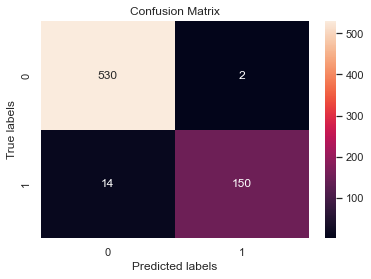

In [12]:
scoring(lgbm_model,x_test,y_test)

In [14]:
df_sample = pd.read_csv('sample_submission.csv')

In [15]:
df_sample["Churn"] =lgbm_model.predict(df_test[x_columns])
df_sample.Churn.replace( 0,'No', inplace=True)
df_sample.Churn.replace( 1,'Yes', inplace=True)
df_sample.to_csv("submit_14.csv",index=False)
df_sample.head()

,customer_id,Churn
0,3322,No
1,3323,No
2,3324,Yes
3,3325,Yes
4,3326,Yes
